# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

In [4]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

### Step 3. Assign it to a variable called chipo.

In [6]:
chipo = pd.read_csv(url, sep = '\t')
chipo.sample()

,order_id,quantity,item_name,choice_description,item_price
4427,1764,2,Steak Bowl,"[Fresh Tomato Salsa, [Rice, Pinto Beans, Sour ...",$23.50


### Step 4. See the first 10 entries

In [7]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

In [37]:
totalbyitem = chipo.groupby('item_name')['quantity'].count().sort_values(ascending=False).head(5)
totalbyitem

item_name
Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Name: quantity, dtype: int64

In [27]:
type(totalbyitem)

pandas.core.series.Series

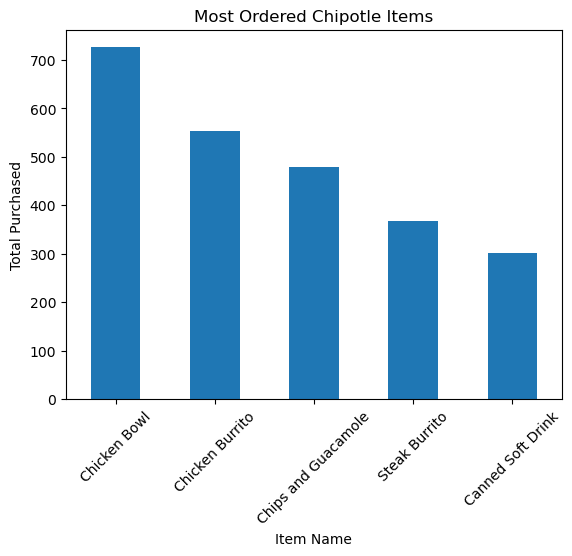

In [39]:
totalbyitem.plot(kind = 'bar')
plt.title('Most Ordered Chipotle Items')
plt.xlabel('Item Name')
plt.xticks(rotation=45)
plt.ylabel('Total Purchased')
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [40]:
chipo.sample()

,order_id,quantity,item_name,choice_description,item_price
3907,1566,1,Chips and Fresh Tomato Salsa,NaN,$2.39


In [48]:
chipo.item_price = chipo.item_price.str.strip('$').astype(float

AttributeError: Can only use .str accessor with string values!

In [52]:
chipo['order_total'] = chipo.quantity * chipo.item_price
chipo.sample()

,order_id,quantity,item_name,choice_description,item_price,order_total
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25,11.25


In [65]:
orders = chipo.groupby('order_id').sum()

In [66]:
orders.sample()

,quantity,item_price,order_total
order_id,,,
974,2,18.0,18.0


(0.0, 10.0)

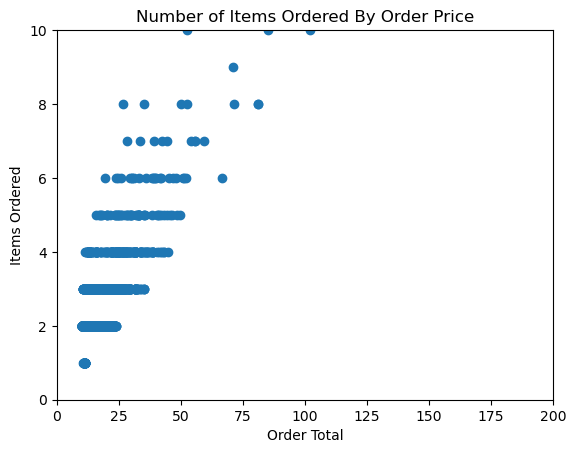

In [68]:
plt.scatter(orders.item_price, orders.quantity)
plt.title('Number of Items Ordered By Order Price')
plt.xlabel('Order Total')
plt.xlim(0, 200)
plt.ylabel('Items Ordered')
plt.ylim(0, 10)

### Step 7. BONUS: Create a question and a graph to answer your own question.